In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_countries=pd.read_csv('/content/drive/MyDrive/API_AG.LND.AGRI.K2_DS2_en_csv_v2_6304041.csv',skiprows=4)

In [ ]:
df_countries.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.000,20.000,20.000,20.000,20.000,20.000,20.00,20.00,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,...,6825399.195,6836525.800,6851382.225,6868999.450,6882362.220,6891016.220,6898158.22,6900855.82,NaN,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377500.0,378000.0,378500.0,379050.0,379100.0,...,379100.000,379100.000,379100.000,379100.000,380100.000,380100.000,383130.00,383130.00,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,2975436.6,2980116.6,2983536.6,2987026.6,2991566.6,...,3566587.601,3584392.737,3593613.009,3599340.982,3618614.614,3627121.603,3633870.46,3641770.46,NaN,NaN
4,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,451770.0,451850.0,451820.0,451900.0,451870.0,...,456740.000,457890.000,458240.000,457720.000,457920.000,458770.000,458920.00,458970.00,NaN,NaN


/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


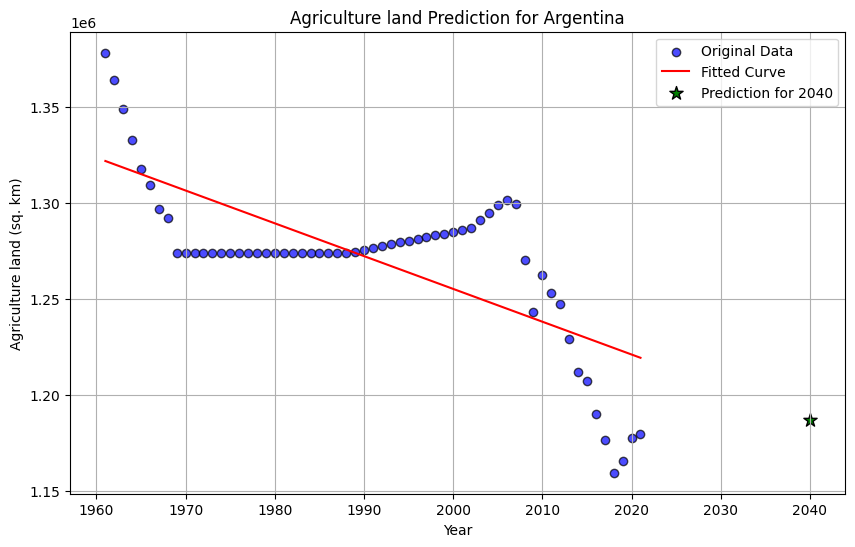

In [ ]:
# Assuming you want to predict CO2 emissions from liquid fuel consumption for Argentina
country_name = 'Argentina'
indicator_name = 'Agricultural land (sq. km)'

# Extract years and CO2 emissions data for the specified country and indicator
country_data = df_countries[(df_countries['Country Name'] == country_name) & (df_countries['Indicator Name'] == indicator_name)]
years = country_data.columns[4:]  # Assuming the years start from the 5th column
agriculture_land = country_data.iloc[:, 4:].values.flatten()

# Convert years to numeric values
years_numeric = pd.to_numeric(years, errors='coerce')
agriculture_land = pd.to_numeric(agriculture_land, errors='coerce')

# Remove rows with NaN or inf values
valid_data_mask = np.isfinite(years_numeric) & np.isfinite(agriculture_land)
years_numeric = years_numeric[valid_data_mask]
agriculture_land= agriculture_land[valid_data_mask]

# Define the model function
def agriculture_land_model(year, a, b, c):
    return a * np.exp(b * (year - 1990)) + c

# Curve fitting with increased maxfev
params, covariance = curve_fit(agriculture_land_model, years_numeric, agriculture_land, p0=[1, -0.1, 90], maxfev=10000)

# Optimal parameters
a_opt, b_opt, c_opt = params

# Generate model predictions for the year 2040
year_2040 = 2040
agriculture_land_2040 = agriculture_land_model(year_2040, a_opt, b_opt, c_opt)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(years_numeric, agriculture_land, label='Original Data', color='blue', alpha=0.7, edgecolors='black')
plt.plot(years_numeric, agriculture_land_model(years_numeric, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')

# Highlight the prediction for 2040
plt.scatter(year_2040, agriculture_land_2040, color='green', marker='*', label='Prediction for 2040', s=100, edgecolors='black')

# Add labels and legend
plt.title(f'Agriculture land Prediction for {country_name}')
plt.xlabel('Year')
plt.ylabel('Agriculture land (sq. km)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


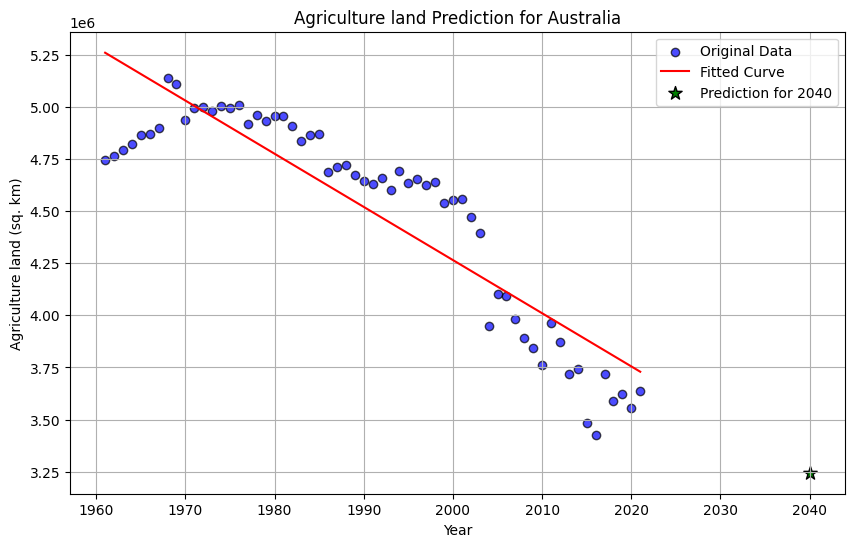

In [ ]:
# Assuming you want to predict CO2 emissions from liquid fuel consumption for Argentina
country_name = 'Australia'
indicator_name = 'Agricultural land (sq. km)'

# Extract years and CO2 emissions data for the specified country and indicator
country_data = df_countries[(df_countries['Country Name'] == country_name) & (df_countries['Indicator Name'] == indicator_name)]
years = country_data.columns[4:]  # Assuming the years start from the 5th column
agriculture_land = country_data.iloc[:, 4:].values.flatten()

# Convert years to numeric values
years_numeric = pd.to_numeric(years, errors='coerce')
agriculture_land = pd.to_numeric(agriculture_land, errors='coerce')

# Remove rows with NaN or inf values
valid_data_mask = np.isfinite(years_numeric) & np.isfinite(agriculture_land)
years_numeric = years_numeric[valid_data_mask]
agriculture_land= agriculture_land[valid_data_mask]

# Define the model function
def agriculture_land_model(year, a, b, c):
    return a * np.exp(b * (year - 1990)) + c

# Curve fitting with increased maxfev
params, covariance = curve_fit(agriculture_land_model, years_numeric, agriculture_land, p0=[1, -0.1, 90], maxfev=10000)

# Optimal parameters
a_opt, b_opt, c_opt = params

# Generate model predictions for the year 2040
year_2040 = 2040
agriculture_land_2040 = agriculture_land_model(year_2040, a_opt, b_opt, c_opt)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(years_numeric, agriculture_land, label='Original Data', color='blue', alpha=0.7, edgecolors='black')
plt.plot(years_numeric, agriculture_land_model(years_numeric, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')

# Highlight the prediction for 2040
plt.scatter(year_2040, agriculture_land_2040, color='green', marker='*', label='Prediction for 2040', s=100, edgecolors='black')

# Add labels and legend
plt.title(f'Agriculture land Prediction for {country_name}')
plt.xlabel('Year')
plt.ylabel('Agriculture land (sq. km)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

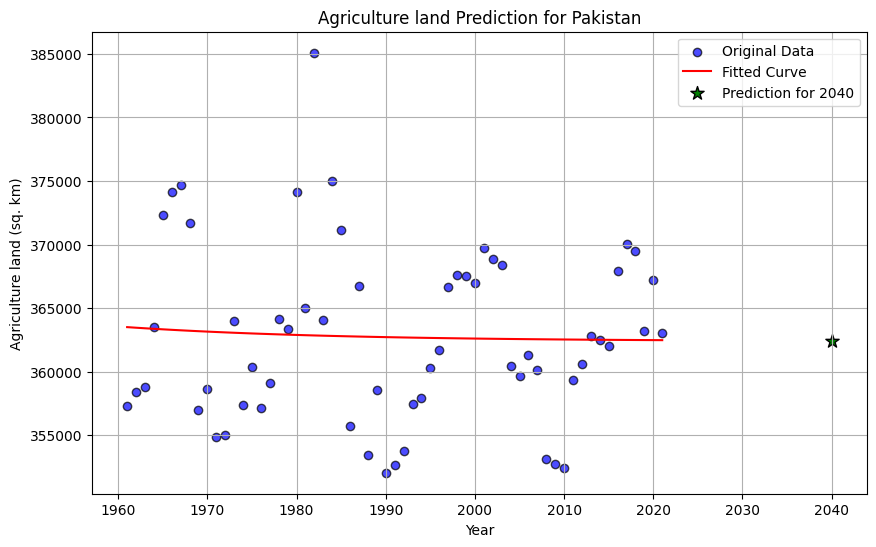

In [ ]:
# Assuming you want to predict CO2 emissions from liquid fuel consumption for Argentina
country_name = 'Pakistan'
indicator_name = 'Agricultural land (sq. km)'

# Extract years and CO2 emissions data for the specified country and indicator
country_data = df_countries[(df_countries['Country Name'] == country_name) & (df_countries['Indicator Name'] == indicator_name)]
years = country_data.columns[4:]  # Assuming the years start from the 5th column
agriculture_land = country_data.iloc[:, 4:].values.flatten()

# Convert years to numeric values
years_numeric = pd.to_numeric(years, errors='coerce')
agriculture_land = pd.to_numeric(agriculture_land, errors='coerce')

# Remove rows with NaN or inf values
valid_data_mask = np.isfinite(years_numeric) & np.isfinite(agriculture_land)
years_numeric = years_numeric[valid_data_mask]
agriculture_land= agriculture_land[valid_data_mask]

# Define the model function
def agriculture_land_model(year, a, b, c):
    return a * np.exp(b * (year - 1990)) + c

# Curve fitting with increased maxfev
params, covariance = curve_fit(agriculture_land_model, years_numeric, agriculture_land, p0=[1, -0.1, 90], maxfev=10000)

# Optimal parameters
a_opt, b_opt, c_opt = params

# Generate model predictions for the year 2040
year_2040 = 2040
agriculture_land_2040 = agriculture_land_model(year_2040, a_opt, b_opt, c_opt)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(years_numeric, agriculture_land, label='Original Data', color='blue', alpha=0.7, edgecolors='black')
plt.plot(years_numeric, agriculture_land_model(years_numeric, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')

# Highlight the prediction for 2040
plt.scatter(year_2040, agriculture_land_2040, color='green', marker='*', label='Prediction for 2040', s=100, edgecolors='black')

# Add labels and legend
plt.title(f'Agriculture land Prediction for {country_name}')
plt.xlabel('Year')
plt.ylabel('Agriculture land (sq. km)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-1a57198e1197>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(agriculture_land_data[years[0]], agriculture_land_data.index, c=colors[labels], cmap='viridis')
<ipython-input-27-1a57198e1197>:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(agriculture_land_data[years[1]], agriculture_land_data.index, c=colors[labels], cmap='viridis')


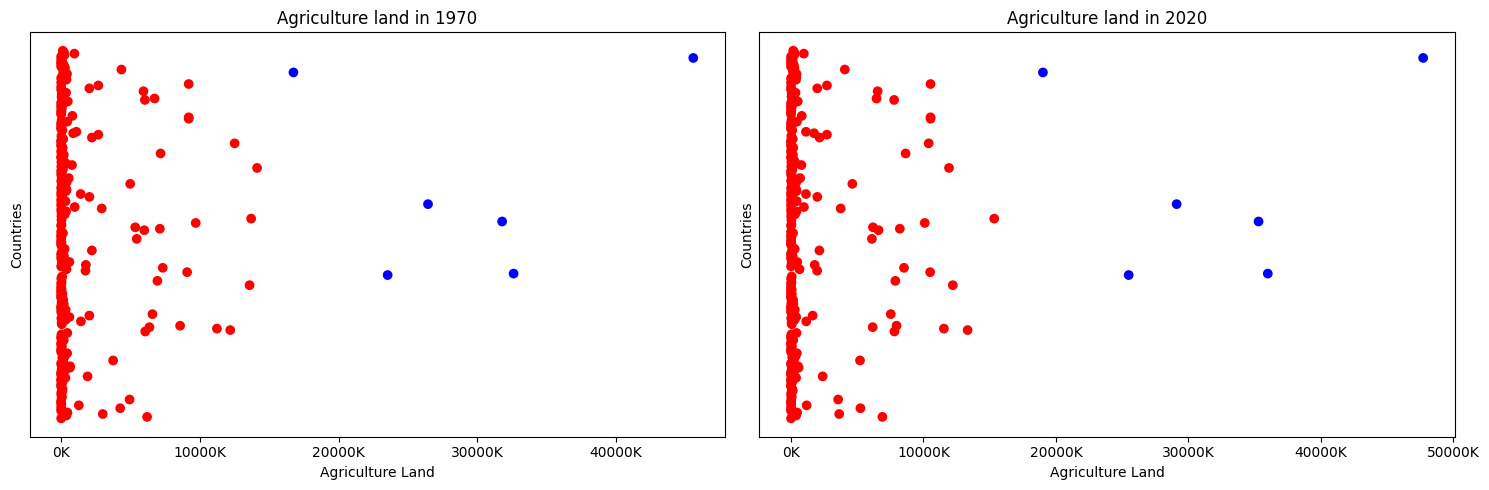

In [ ]:
# Extract data for the years 1970 and 2020
years = ['1970', '2020']
agriculture_land_data = df_countries[['Country Name'] + years]

# Drop rows with missing values
agriculture_land_data = agriculture_land_data.dropna()

# Set 'Country Name' as the index
agriculture_land_data.set_index('Country Name', inplace=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(agriculture_land_data)

# Perform KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
agriculture_land_data['Cluster'] = labels

# Define a custom formatter to display numbers in thousands
def format_thousands(x, pos):
    return f'{int(x / 1000)}K'

# Custom color map for clusters
colors = np.array(['red', 'blue'])

# Visualize the clusters
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Cluster for 1970
axs[0].scatter(agriculture_land_data[years[0]], agriculture_land_data.index, c=colors[labels], cmap='viridis')
axs[0].set_title(f'Agriculture land in {years[0]}')
axs[0].set_xlabel('Agriculture Land')
axs[0].set_ylabel('Countries')
axs[0].xaxis.set_major_formatter(FuncFormatter(format_thousands))  # Apply custom formatter to x-axis

# Cluster for 2020
axs[1].scatter(agriculture_land_data[years[1]], agriculture_land_data.index, c=colors[labels], cmap='viridis')
axs[1].set_title(f'Agriculture land in {years[1]}')
axs[1].set_xlabel('Agriculture Land')
axs[1].set_ylabel('Countries')
axs[1].xaxis.set_major_formatter(FuncFormatter(format_thousands))  # Apply custom formatter to x-axis

# Manually set y-axis label
for ax in axs:
    ax.set_yticks([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [ ]:
years = ['1970', '2020']
agriculture_land_data = df_countries[['Country Name'] + years]

In [ ]:
agriculture_land_data.head()

,Country Name,1970,2020
0,Aruba,20.0,20.00
1,Africa Eastern and Southern,6194850.0,6898158.22
2,Afghanistan,380060.0,383130.00
3,Africa Western and Central,2999926.6,3633870.46
4,Angola,452050.0,458920.00


In [ ]:
# Drop rows with missing values
agriculture_land_data = agriculture_land_data.dropna()